In [ ]:
Name - Gunjal Abhishek Dattatraya.
Class - BE Artificial Intelligence and Data Science.
Roll No. - 19
Practical No. 02- Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset. a.

Perform Data Pre-processing b. Define Model and perform training c. Evaluate Results using confusion

matrix

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# A) Data Pre-processing
(x_train, y_train), (x_test,y_test)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
# Normalize pixel vallues to be between 0 and 1 
x_train = x_train.astype("float32")/ 255
x_test= x_test.astype("float32")/255

In [7]:
# Add a channel dimension (for grayscale images, it's 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test,axis=-1)

In [8]:
# one-hot encode the labels
num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

In [13]:
# B) define model and perform training 
model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)), # Input shape for MNIST
        layers.Conv2D(32, kernel_size=(3,3),activation = 'relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        #Add dropout for regularization
        layers.Dense(num_classes, activation="softmax"),
    ]
)
                     


In [14]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
epochs = 10  # Adjust as needed
batch_size = 128 # Adjust as needed

In [16]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)  #Added validation_split


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.3293 - loss: 1.9464 - val_accuracy: 0.8892 - val_loss: 0.4123
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8400 - loss: 0.5234 - val_accuracy: 0.9272 - val_loss: 0.2653
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8856 - loss: 0.3821 - val_accuracy: 0.9478 - val_loss: 0.2024
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9092 - loss: 0.3055 - val_accuracy: 0.9600 - val_loss: 0.1653
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9224 - loss: 0.2658 - val_accuracy: 0.9612 - val_loss: 0.1429
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9273 - loss: 0.2396 - val_accuracy: 0.9665 - val_loss: 0.1309
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9350 - loss: 0.2125 - val_accuracy: 0.9705 - val_loss: 0.1194
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9391 - loss: 0.2029 - val_accu

In [17]:
# c. Evaluate Results using confusion matrix

# Make predictions on the test set
y_pred_probabilities = model.predict(x_test)
y_pred = np.argmax(y_pred_probabilities, axis=1) # Get predicted labels
y_true = np.argmax(y_test, axis=1) # Get true labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix:
[[ 969    0    1    0    0    2    3    1    4    0]
 [   0 1125    4    1    0    0    1    1    3    0]
 [   4    1 1006    3    4    0    0    7    6    1]
 [   0    0    5  976    0   13    0    9    7    0]
 [   2    0    3    0  944    2    4    4    4   19]
 [   2    0    2    5    1  867    4    1    7    3]
 [   8    4    1    0    2    7  934    0    2    0]
 [   1    7   23    3    1    0    0  975    2   16]
 [   7    0    4    8    4    5    2    7  927   10]
 [   2    6    1    9    9    4    0    8    3  967]]


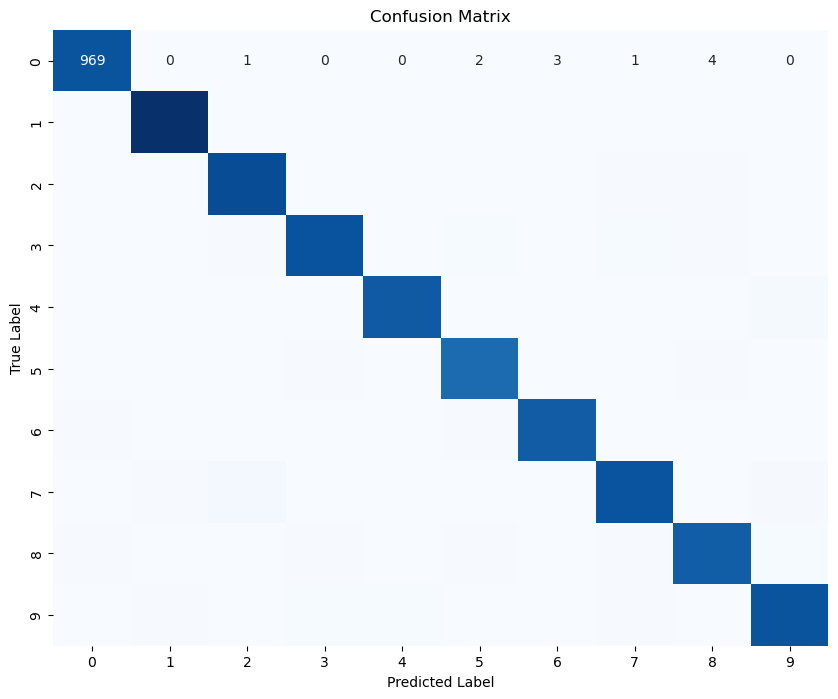

In [18]:
#Plot the confusion matrix (Optional, requires seaborn)
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [19]:
# Evaluate the model's performance (optional)
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Test Loss: 0.10646841675043106
Test Accuracy: 0.968999981880188


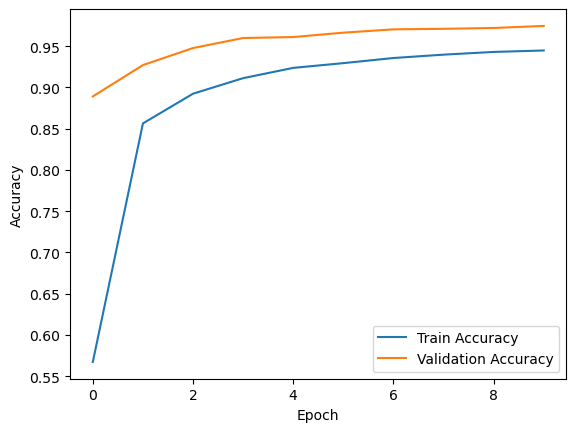

In [20]:
# Plot training history (optional)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') #Added validation accuracy
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

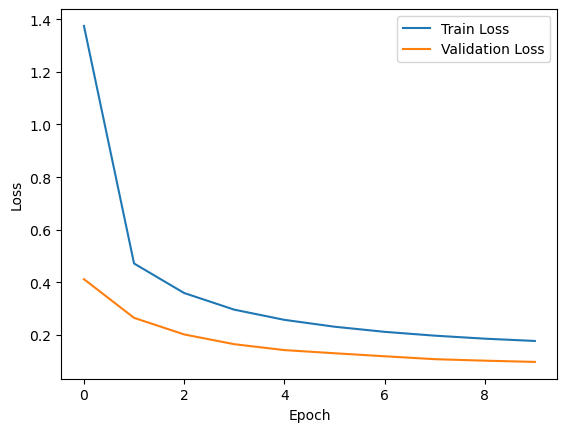

In [21]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss') #Added validation loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()